# iris 데이터 주성분 분석 후 분류하기

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [2]:
from sklearn.model_selection import train_test_split
X, y = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)  

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues : %s' % eigen_vals)

Eigenvalues : [2.8998938  0.98708902 0.13466453 0.01681419]


In [7]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.71806894055277,
 0.24442204363321526,
 0.03334550252484883,
 0.004163513289165912]

In [8]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

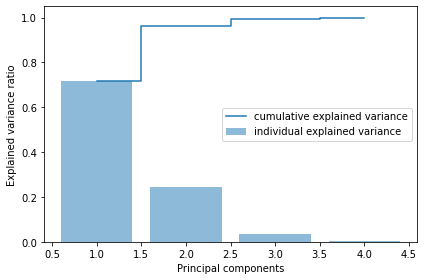

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(2.899893798386186,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649076,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.13466452942727408,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283170026,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [15]:
X_train_pca = X_train_std.dot(w)

In [16]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

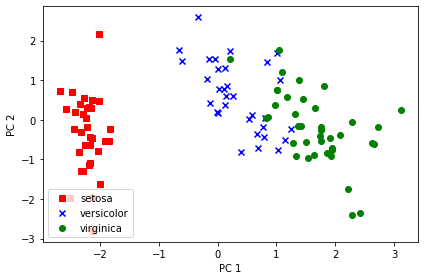

In [17]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(X_train_pca, y_train)

C:\Users\rkdtk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30))

In [19]:
print(mlp.score(X_train_pca, y_train))

0.9238095238095239


In [20]:
X_test_pca = X_test_std.dot(w)
pred = mlp.predict(X_test_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [21]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, pred, margins=True,
                               rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,1,10,11
All,16,16,13,45


In [22]:
print(mlp.score(X_test_pca, y_test))

0.9111111111111111


# PCA를 이용해서 얼굴 주성분 분석하기

In [23]:
# from imageio import imread
from skimage import io
import glob
imgs = []
for image_path in glob.glob("./image/korean_beauty/*.png"):
#     image = imread(image_path)
    image = io.imread(image_path, as_gray=True)
    imgs.append(image)

In [24]:
import numpy as np
N = len(imgs) #이미지의 개수
images = np.array(imgs)

In [25]:
origin_shape = images.shape

In [26]:
origin_shape

(0,)

In [27]:
fig_size = (origin_shape[2], origin_shape[1])
fig_size

IndexError: tuple index out of range

In [24]:
images.shape = (N, -1)
images.shape

(20, 1050)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
images_std = sc.fit_transform(images)
images_std

array([[-0.34846806, -0.64595379,  0.31760955, ..., -1.39434474,
        -1.18364742, -1.11041408],
       [ 0.67771125,  1.94825646,  1.77498085, ..., -1.50651352,
        -1.49234078, -1.39898864],
       [-0.08074358, -0.51207572, -0.73079353, ...,  0.82449157,
         0.73738828,  0.9538411 ],
       ...,
       [-0.64968146, -0.6966082 , -0.99570981, ..., -0.61142541,
        -1.36434192, -1.43529639],
       [ 0.28960996, -0.21467105, -0.66305684, ...,  0.84051043,
         0.71770162,  0.34472421],
       [-0.67518412, -0.73399219, -1.02074743, ...,  0.20354346,
        -1.03574422, -1.58445642]])

In [26]:
import numpy as np
cov_mat = np.cov(images_std)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [27]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

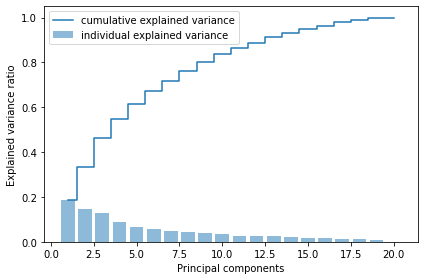

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, N+1), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, N+1), cum_var_exp, where='mid', 
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
eigen_pairs = [(np.abs(eigen_vals[i]), 
                eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=False)

In [30]:
w = eigen_pairs[0][1][:, np.newaxis]
for i in range(1,N):
    w = np.hstack((w,eigen_pairs[i][1][:, np.newaxis]))


In [31]:
print('Matrix W:\n', w)

Matrix W:
 [[ 2.23606798e-01 -2.30446865e-01  2.11017560e-01  2.03412770e-01
   2.47971446e-02 -5.54192500e-01  1.33845339e-02 -8.53830817e-02
   1.73199093e-03  2.03607514e-01  1.82260567e-01 -1.96257933e-02
   5.75528038e-02  1.78009974e-01  2.54568256e-01 -2.25789263e-01
   4.79072093e-01  1.89632082e-01  1.78412928e-02 -6.43269432e-02]
 [ 2.23606798e-01 -1.46150839e-01  1.39068237e-01  4.78264540e-02
   8.69062065e-02  1.41575840e-01  3.64276739e-01 -2.23630634e-01
   7.91599885e-03  2.81333614e-01 -3.17054694e-01 -1.58989180e-01
   7.43483446e-02 -3.24528568e-01  2.28132852e-01  2.44611058e-01
  -3.06669911e-02  1.28478738e-01  1.00970256e-02  5.01418625e-01]
 [ 2.23606798e-01 -2.86693730e-01 -6.63908273e-02  4.69685230e-02
   4.63098400e-02  2.40602117e-01 -1.33638050e-01  4.84139447e-01
   3.90841448e-01  1.84249017e-01 -3.66632239e-02 -2.96945066e-01
   2.37907737e-02  1.89080989e-01  2.75593874e-01 -1.96135233e-02
  -2.40987291e-02 -3.93555221e-01 -3.77334605e-02 -5.60262082e-

In [32]:
images_pca = images_std.T @ w
images_pca.shape

(1050, 20)

In [33]:
result = images_pca.T
result

array([[ 1.40988134e-15, -1.44317886e-16, -1.25841272e-15, ...,
        -4.70887239e-16, -2.64901642e-16,  1.89966836e-15],
       [ 1.79356711e-01,  2.23372832e-02,  6.07306229e-03, ...,
        -4.05934131e-02, -4.56183971e-02, -1.11519402e-01],
       [ 8.39842208e-01,  2.95128229e-01,  1.98750934e-01, ...,
         7.55725338e-01,  6.91592851e-01,  6.94554169e-01],
       ...,
       [ 1.79941549e+00,  1.66416412e+00,  1.79132166e+00, ...,
        -2.07016564e+00, -2.03417259e+00, -1.93797791e+00],
       [ 2.67281261e-01, -4.28811844e-01, -5.37148222e-01, ...,
         1.21727181e+00,  1.57974752e+00,  1.38464373e+00],
       [ 2.62195025e-01,  3.22855379e+00,  3.22610750e+00, ...,
        -2.14626146e+00, -1.78128238e+00, -1.68331120e+00]])

In [34]:
result_img = sc.inverse_transform(result)
result_img.shape

(20, 1050)

In [35]:
result_img.shape = origin_shape
result_img.shape

(20, 35, 30)

In [36]:
# result_img = result_img.astype(np.uint8)

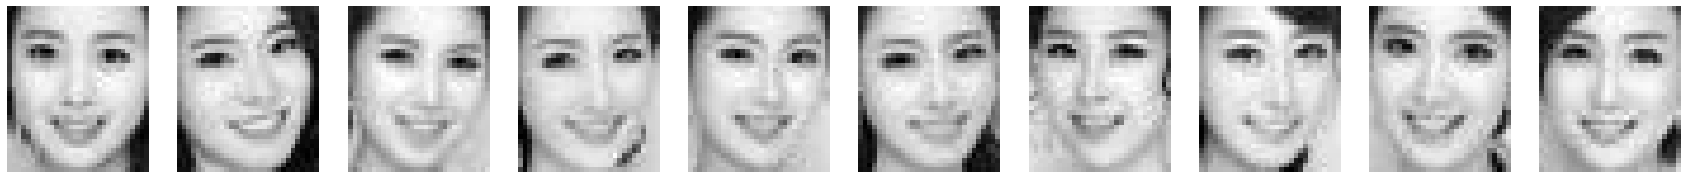

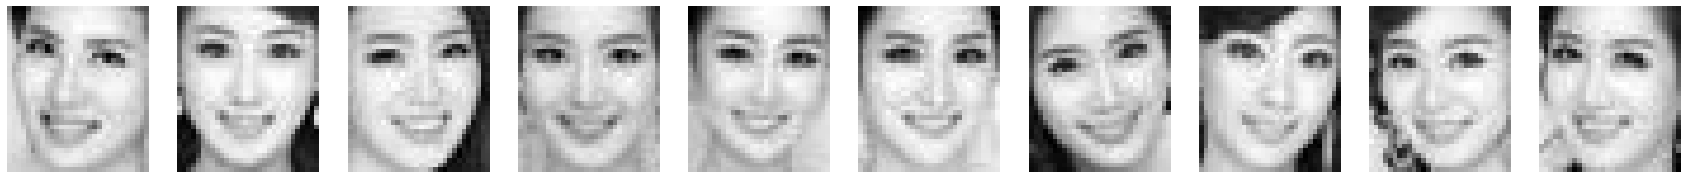

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
images.shape = origin_shape
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

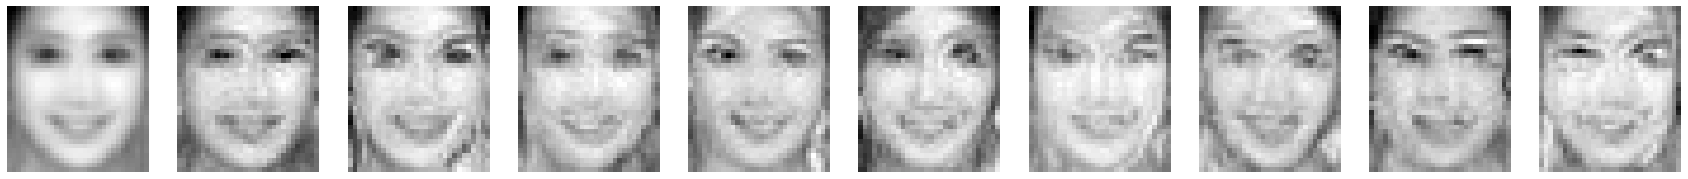

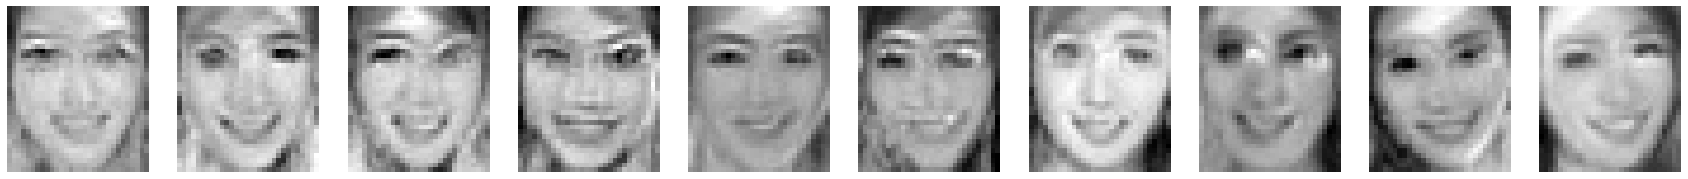

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(result_img[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

# 특잇값 분해

In [39]:
x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]

In [40]:
import numpy as np
A = np.c_[x, [1]*8] 		# column_stack((x, np.ones((8))))
B = np.array(y)

In [41]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
U

array([[-0.09523708, -0.75291219, -0.30570949, -0.28090959, -0.27189145,
        -0.25160063, -0.24258249, -0.23581888],
       [-0.19045071, -0.49902645, -0.10192726,  0.12193311,  0.20333687,
         0.38649535,  0.46789912,  0.52895194],
       [-0.28566433, -0.24514071,  0.91852536, -0.0671799 , -0.06198182,
        -0.05028612, -0.04508804, -0.04118947],
       [-0.3511237 , -0.07059426, -0.09192115,  0.8886239 , -0.11845062,
        -0.13436831, -0.14144283, -0.14674873],
       [-0.37492711, -0.00712283, -0.09571988, -0.12744744,  0.86101527,
        -0.16494364, -0.17648094, -0.18513391],
       [-0.42848478,  0.1356879 , -0.10426703, -0.16360796, -0.18518648,
         0.76626184, -0.25531668, -0.27150057],
       [-0.45228818,  0.19915934, -0.10806576, -0.1796793 , -0.20572059,
        -0.26431349,  0.70964522, -0.30988575],
       [-0.47014074,  0.24676291, -0.1109148 , -0.19173281, -0.22112118,
        -0.287245  , -0.31663336,  0.66132536]])

In [42]:
s

array([336.0759044 ,   0.99321713])

In [43]:
VT

array([[-0.99996895, -0.00788011],
       [ 0.00788011, -0.99996895]])

In [44]:
S = np.zeros((1,1))
S[0][0] = s[0]

A2 = U[:,0:1] @ S @ VT[0:1,0:1]

In [45]:
A2

array([[ 32.00589279],
       [ 64.00390571],
       [ 96.00191863],
       [118.00055252],
       [126.00005575],
       [143.99893802],
       [151.99844125],
       [157.99806867]])

In [46]:
A

array([[ 32,   1],
       [ 64,   1],
       [ 96,   1],
       [118,   1],
       [126,   1],
       [144,   1],
       [152,   1],
       [158,   1]])

In [47]:
weight, bias = np.linalg.inv(A.T @ A) @ A.T @ B
weight, bias

(0.8744839346616408, -26.72383773110748)

In [48]:
A2

array([[ 32.00589279],
       [ 64.00390571],
       [ 96.00191863],
       [118.00055252],
       [126.00005575],
       [143.99893802],
       [151.99844125],
       [157.99806867]])

In [49]:
x2 = np.c_[A2, [1]*8]
x2

array([[ 32.00589279,   1.        ],
       [ 64.00390571,   1.        ],
       [ 96.00191863,   1.        ],
       [118.00055252,   1.        ],
       [126.00005575,   1.        ],
       [143.99893802,   1.        ],
       [151.99844125,   1.        ],
       [157.99806867,   1.        ]])

In [50]:
weight2, bias2 = np.linalg.inv(x2.T @ x2) @ x2.T @ B
weight2, bias2

(0.8745382401681364, -26.730728978671934)

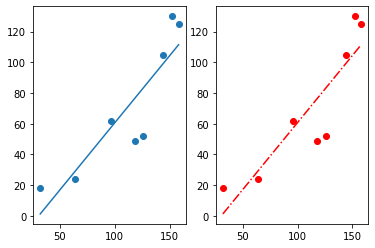

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x, y)
ax[0].plot(A[:,0], weight*A[:,0] + bias, '-')
ax[1].scatter(A2[:,0], y, color="red")
ax[1].plot(A2[:,0], weight2*A2[:,0] + bias2, '-.', color="red")
plt.show()

In [52]:
Uw, Uv = np.linalg.eig(A @ A.T)
Uv

array([[-9.52370763e-02,  7.52912191e-01, -1.25315273e-01,
         5.76776272e-02, -2.34839046e-05,  4.68087557e-05,
         7.50760311e-06,  6.14604191e-06],
       [-1.90450705e-01,  4.99026450e-01,  4.22585227e-01,
         1.38292129e-01, -4.30685998e-05,  2.63738135e-06,
        -3.72555436e-06, -1.66502404e-06],
       [-2.85664334e-01,  2.45140710e-01, -5.13313109e-01,
        -5.39946563e-01,  4.99714310e-01, -4.83593412e-01,
         1.21372977e-01, -6.65622644e-02],
       [-3.51123704e-01,  7.05942631e-02,  2.64104678e-01,
         3.63054867e-01, -5.24072076e-01,  7.20780965e-01,
         2.94938636e-01,  6.57241081e-01],
       [-3.74927111e-01,  7.12282792e-03, -7.80217584e-02,
        -3.02473376e-02, -3.39467962e-01, -6.66658455e-02,
        -7.52172119e-01, -5.60908617e-01],
       [-4.28484777e-01, -1.35687901e-01, -2.55617228e-01,
        -2.86389376e-01,  1.92369723e-01,  3.36439963e-01,
         1.30608419e-01, -4.10218120e-01],
       [-4.52288185e-01, -1.991593

In [53]:
Vw, Vv = np.linalg.eig(A.T @ A)
Vv

array([[ 0.99996895, -0.00788011],
       [ 0.00788011,  0.99996895]])

In [54]:
s = np.sqrt(Vw)
s

array([336.0759044 ,   0.99321713])

In [55]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [56]:
U, s, VT = np.linalg.svd(iris.data)
U

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [57]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [58]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [59]:
N = 3
S = np.zeros((3,3))
for i in range(N):
    S[i][i] = s[i]

In [60]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [61]:
iris2 = U[:,0:3] @ S @ VT[0:3,:]
iris_df = pd.DataFrame(data=np.c_[iris2, iris.target], 
                       columns=['A', 'B', 'C', 'D', 'Species'])
iris_df.head()

,A,B,C,D,Species
0,5.099009,3.500980,1.401484,0.197678,0.0
1,4.868704,3.030949,1.446898,0.126653,0.0
2,4.694221,3.205715,1.308660,0.186456,0.0
3,4.625181,3.075098,1.462266,0.259016,0.0
4,5.019480,3.580736,1.370809,0.245653,0.0


In [62]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    iris_df.iloc[:,:-1], iris_df.iloc[:,-1], 
    test_size=0.3, random_state=1)

In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000)
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [64]:
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred, 
                               rownames=['True'], colnames=['Pred'], 
                               margins=True)
confusion_matrix

Pred,0.0,1.0,2.0,All
True,,,,
0.0,14,0,0,14
1.0,0,18,0,18
2.0,0,0,13,13
All,14,18,13,45


In [65]:
mlp.score(test_x, test_y)

1.0

In [67]:
from sklearn import datasets
from sklearn.utils.extmath import randomized_svd
import numpy as np
import pandas as pd

iris = datasets.load_iris()

U, s, VT = randomized_svd(iris['data'], n_components=3, 
                          n_iter=5, random_state=None)

In [68]:
U

array([[ 6.16168450e-02,  1.29611444e-01, -2.13859674e-03],
       [ 5.80709402e-02,  1.11019776e-01, -7.06723871e-02],
       [ 5.67630474e-02,  1.17966465e-01, -4.34254909e-03],
       [ 5.66534426e-02,  1.05308145e-01, -5.92467197e-03],
       [ 6.12302023e-02,  1.31089790e-01,  3.18810953e-02],
       [ 6.75031684e-02,  1.30884835e-01,  6.85371918e-02],
       [ 5.74820774e-02,  1.16598182e-01,  6.64136685e-02],
       [ 6.09726328e-02,  1.20943120e-01, -5.43026565e-03],
       [ 5.37611959e-02,  9.99414853e-02, -1.76366479e-02],
       [ 5.88266594e-02,  1.12043088e-01, -6.49689136e-02],
       [ 6.52918230e-02,  1.36578094e-01, -4.93585934e-03],
       [ 5.99417779e-02,  1.13753142e-01,  2.52977575e-02],
       [ 5.71132323e-02,  1.11354756e-01, -7.16796746e-02],
       [ 5.15957540e-02,  1.15324791e-01, -4.26212003e-03],
       [ 6.80071908e-02,  1.64183057e-01, -9.57009112e-03],
       [ 7.07625894e-02,  1.59056485e-01,  1.19142652e-01],
       [ 6.53647385e-02,  1.46844820e-01

In [68]:
s

array([95.95991387, 17.76103366,  3.46093093])

In [69]:
VT

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [-0.50215472,  0.67524332,  0.05916621,  0.53701625]])

In [70]:
S = np.zeros((3,3))
for i in range(3):
    S[i][i] = s[i]

In [71]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [72]:
iris2 = U[:,0:3] @ S @ VT[0:3,:]

In [73]:
columns = ['A', 'B', 'C', 'D', 'Species']

iris_df = pd.DataFrame(data=np.c_[iris2,  
                                  iris['target_names'][iris['target']]],
                       columns=columns)

iris_df.head()

,A,B,C,D,Species
0,5.09900941982427,3.5009795935340757,1.4014843995399509,0.197678441206073,setosa
1,4.868703642816378,3.030949245591971,1.4468980697813891,0.12665274854458247,setosa
2,4.694221066713818,3.2057148384549747,1.308659819893004,0.18645628721583987,setosa
3,4.625181192541417,3.075098095037366,1.4622655979398056,0.2590155349533656,setosa
4,5.019479625287904,3.5807364255354743,1.370809483649882,0.24565313994426546,setosa


# 분류 모형의 변수 선택

In [28]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
X = redwine.iloc[:, :-1];
y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

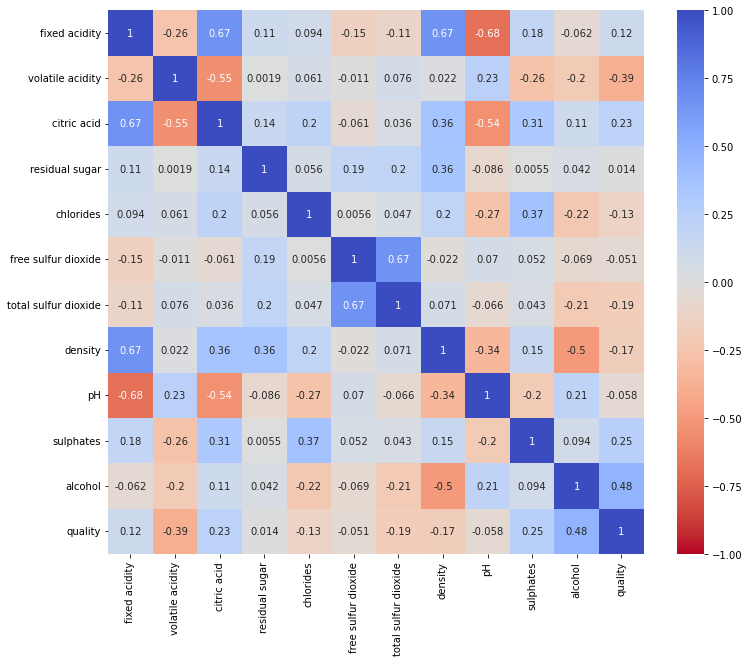

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True, 
            vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [32]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [33]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [79]:
features = pd.DataFrame(data=np.c_[X.columns,
                                   rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [80]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


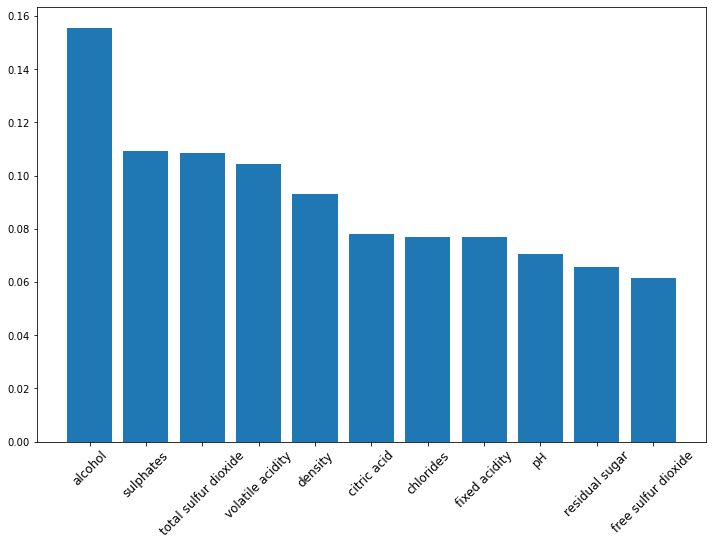

In [81]:
plt.figure(figsize=(12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

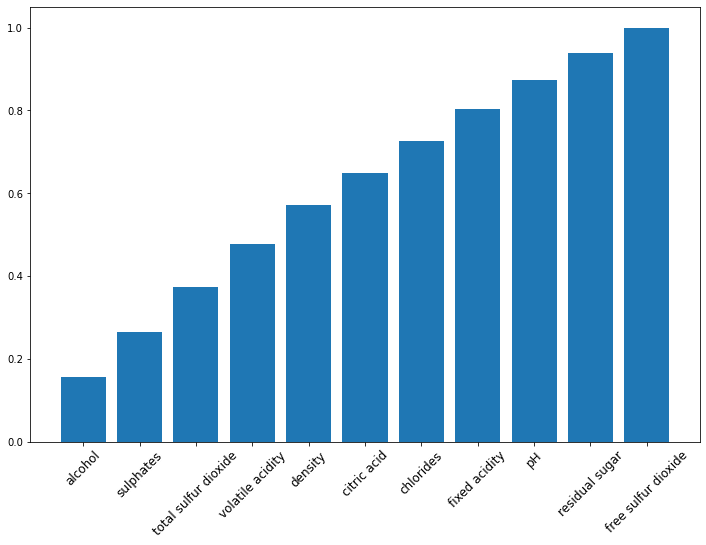

In [82]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [84]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [85]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, 
                                       rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [86]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
4,density,0.093134,False
5,citric acid,0.078026,False
6,chlorides,0.077069,False
7,fixed acidity,0.076794,False
8,pH,0.070383,True
9,residual sugar,0.065735,False


In [87]:
import pickle
with open("rfe.model", "wb") as f:
    pickle.dump(rfe_model, f)

In [88]:
import pickle
with open("rfe.model", "rb") as f:
    rfe_model = pickle.load(f)

In [89]:
rfe_model.predict(test_X[:10])

array([5, 6, 8, 6, 6, 6, 6, 5, 5, 6], dtype=int64)

In [90]:
test_y[:10].values

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5], dtype=int64)

# 회귀 분석 시작

# 회귀모형의 변수 선택
- 각 모델 학습에 적용해 보자!!

In [91]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [94]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
                        columns = ['feature', 'coef'])

In [95]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
8,RAD,7.073460145683998
1,ZN,6.078411384243512
11,B,2.5580141534966128
3,CHAS,2.4395598751548504
5,RM,14.591352506822624
2,INDUS,1.6141996129903846
6,AGE,0.3360121909384357
10,PTRATIO,-9.451384184058607
0,CRIM,-7.245609178578958
9,TAX,-5.91072871694803


# SelectKBest
- 가장 높은 score에 따라 k개의 특징을 선택하는 것
- chi2 대신에 f-regression 사용해보자

In [75]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [80]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [81]:
X_new[:5]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

In [78]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [82]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [72]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

In [74]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

# 평균값 인코딩의 오버피팅 해결
- 넘어가자

In [100]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sex_mean = titanic.groupby("sex")["survived"].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean) 

In [101]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic["survived"].mean()
alpha = 0.7
def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)
titanic['sex_mean_smoothing'] = titanic.apply(
    lambda x:smoothing(x['sex_n_rows'], 
                       x['sex_mean']), axis=1)
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


In [102]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size=0.2, 
                               random_state=42, shuffle=True)

# train -> train_new 로 될 예정. 미리 데이터프레임 만들어주기.
train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan
from sklearn.model_selection import StratifiedKFold

# Kfold 만들어 주기.
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 Fold iteration.
for tr_idx, val_idx in skf.split(X_train, Y_train):
    X_train, X_val = train.iloc[tr_idx], train.iloc[val_idx]

    # train set 에서 구한 mean encoded 값을 validation set 에 매핑해줌.
    means = X_val['sex'].map(X_train.groupby('sex')["survived"].mean())
    X_val['sex_mean'] = means
    train_new.iloc[val_idx] = X_val

# 폴드에 속하지못한 데이터들은 글로벌 평균으로 채워주기.
global_mean = train["survived"].mean()
train_new['sex'] = train_new['sex'].fillna(global_mean)
train_new[['sex', 'sex_mean']].head()

<ipython-input-102-ff6e4eeb827a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['sex_mean'] = means


,sex,sex_mean
331,male,0.184987
733,male,0.193029
382,male,0.177419
704,male,0.184000
813,female,0.751269


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

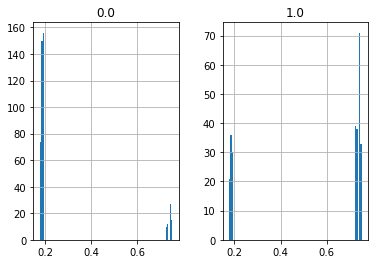

In [103]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)

In [104]:
cumsum = train.groupby('sex')["survived"].cumsum() - train["survived"] 
cumcnt = train.groupby('sex').cumcount() + 1 
train_new['sex_mean'] = cumsum / cumcnt

In [105]:
train_new[['sex','sex_mean']].tail()

,sex,sex_mean
106,female,0.733607
270,male,0.187097
860,male,0.186695
435,female,0.734694
102,male,0.186296


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

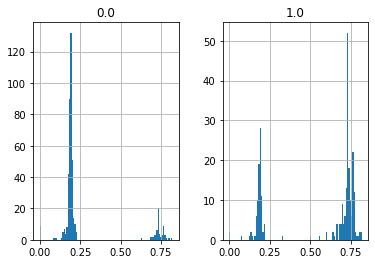

In [106]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)